# Text Classification with Machine Learning
### Data source: Fake and real news dataset, kaggle
### Ricardo Flores
### www.rflores.cl

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split

# feature extraction
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

# models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm

# metrics
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix

# plots
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt


In [2]:
# Clean data
stop_w = stopwords.words('english')

# Lemmatization
lemmatizer = WordNetLemmatizer()

def clean_news(w0):
    # remove special characters
    w1 = re.sub('[^A-Za-z0-9]+', ' ', w0)

    # lowercase
    w1 = w1.lower()
    
    # tokenization
    tokens = word_tokenize(w1)
    
    # stopwords
    filtered_w1 = [w for w in tokens if w not in stop_w]

    # Lemmatization 
    lemm_review = [lemmatizer.lemmatize(w) for w in filtered_w1]
    
    return ' '.join(lemm_review)


In [3]:
def wordcloud_plot(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [4]:
def models_cls(data, model_type = 'NB', features = 'BOW'):
    '''run different classification models,
    for a given feature extraction.
    Model_type: Naive Bayes (NB), Logistic regression (Logistic), Decision Tree (Tree), 
    Support-vector Machine (SVM), and K-nearest neighbors (KNN).
    features: bag-of-words (BOW), term of frequency (TF), 
    and the term frequency-inverse dense frequency (TFIDF).
    '''
    # tran and test data
    X_train, X_test, y_train, y_test = data

    # feature extraction 
    if features == 'BOW':
        vect = CountVectorizer(min_df=10)
    elif features == 'TF':
        vect = TfidfVectorizer(min_df=10, use_idf= False)
    elif features == 'TFIDF':
        vect = TfidfVectorizer(min_df=10)

    X_train_feat = vect.fit_transform(X_train)
    X_test_feat = vect.transform(X_test)

    # model, prediction
    if model_type == 'NB':
        clf = MultinomialNB()
    elif model_type == 'Logistic':
        clf = LogisticRegression(penalty='l2')
    elif model_type == 'Tree':
        clf = tree.DecisionTreeClassifier()
    elif model_type == 'SVM':
        clf = svm.SVC()
    elif model_type == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=2)

    clf.fit(X_train_feat, y_train)
    y_pred = clf.predict(X_test_feat)

    # metrics 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    return precision, recall, acc

In [5]:
# run a model, with feature type, and plot wordcloud
def models_cls_confusion_matrix(data, model_type = 'NB', features = 'BOW'):
    '''run different classification models,
    with feature type, and plot wordcloud
    '''
    # tran and test data
    X_train, X_test, y_train, y_test = data

    # feature extraction 
    if features == 'BOW':
        vect = CountVectorizer(min_df=10)
    elif features == 'TF':
        vect = TfidfVectorizer(min_df=10, use_idf= False)
    elif features == 'TFIDF':
        vect = TfidfVectorizer(min_df=10)

    X_train_feat = vect.fit_transform(X_train)
    X_test_feat = vect.transform(X_test)

    # model, prediction
    if model_type == 'NB':
        clf = MultinomialNB()
    elif model_type == 'Logistic':
        clf = LogisticRegression(penalty='l2')
    elif model_type == 'Tree':
        clf = tree.DecisionTreeClassifier()
    elif model_type == 'SVM':
        clf = svm.SVC()
    elif model_type == 'KNN':
        clf = KNeighborsClassifier(n_neighbors=2)

    clf.fit(X_train_feat, y_train)
    y_pred = clf.predict(X_test_feat)

    # plot 
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
    plt.title('Test Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


##  1 – Data Exmploration 
#### Source: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [6]:
# load data: 5% random sampling of orginal data
df_fake = pd.read_csv('./data/fake.csv')
df_true = pd.read_csv('./data/true.csv')


In [7]:
df_fake

,title,text,subject,date
0,Anti-Trump Protesters Pepper Sprayed AGAIN (V...,While I don t believe Donald Trump can possibl...,News,19-Mar-16
1,WATCH: PRESIDENT TRUMP’S Beautiful Video Honor...,"Yesterday, President Trump took to Twitter to ...",left-news,3-Dec-17
2,LOL! ARROGANT OBAMA BEGS Congress To Save Emba...,Barack Obama implored members of Congress to h...,politics,8-May-17
3,"Trump Staff Clapped, Laughed While He Called ...",During president-elect Donald Trump s first pr...,News,11-Jan-17
4,HOW MUSLIM IMMIGRANTS HAVE DESTROYED BRITAIN’S...,The result of Britain s willingness to allow M...,politics,23-Sep-15
...,...,...,...,...
1169,WOW! BLACK TRUMP SUPPORTER’S Epic Takedown Of ...,This wonderful lady is so right and so dead on...,politics,2-Oct-16
1170,Twitter Mocks The Hell Out Of Trump For Lates...,"When Trump promised to drain the swamp, he s...",News,15-Dec-16
1171,Republican Committee Passes Bill That Would P...,Florida Republicans war on women is going str...,News,28-Jan-16
1172,MUSLIM SCHOLAR CRITICIZES OBAMA…Explains Why A...,".@MissDiagnosis: ""He's our president and I thi...",politics,20-Nov-16


In [8]:
df_true

,title,text,subject,date
0,"McCain presses U.S. Air Force, Pentagon over R...",WASHINGTON (Reuters) - The head of the U.S. Se...,politicsNews,10-Feb-16
1,China foreign minister to visit Myanmar amid R...,BEIJING (Reuters) - Chinese Foreign Minister W...,worldnews,16-Nov-17
2,Democrat Hassan declares victory in New Hampsh...,BOSTON (Reuters) - New Hampshire Governor Magg...,politicsNews,9-Nov-16
3,Burkina Faso recalls ambassador to Libya over ...,OUAGADOUGOU (Reuters) - Burkina Faso s foreign...,worldnews,20-Nov-17
4,U.S. House passes $1.2 trillion measure to fun...,WASHINGTON (Reuters) - The U.S. House of Repre...,politicsNews,14-Sep-17
...,...,...,...,...
1066,Illinois fix to unpaid bills may end up as fin...,CHICAGO (Reuters) - Illinois owes a handful of...,politicsNews,23-Nov-16
1067,White House says executive order does not appl...,WASHINGTON (Reuters) - The White House confirm...,politicsNews,30-Jan-17
1068,EU could respond to 'market distortions' if U....,BERLIN (Reuters) - If President Donald Trump q...,politicsNews,1-Jun-17
1069,"EU drugs agency, seeking staff, warns of Brexi...",LONDON (Reuters) - Europe s drugs regulator ha...,worldnews,6-Oct-17


### Wordcloud Fake News

In [9]:
# word counting for fake news
fake_lemm = ''
for i in df_fake.text:
    lemm_clean = clean_news(i)
    fake_lemm += lemm_clean + ' '
    

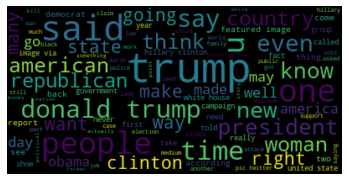

In [10]:
# Wordcloud 
wordcloud_plot(fake_lemm)

### Wordcloud True News

In [11]:
# word counting for true news
true_lemm = ''
for i in df_true.text:
    lemm_clean = clean_news(i)
    true_lemm += lemm_clean + ' '

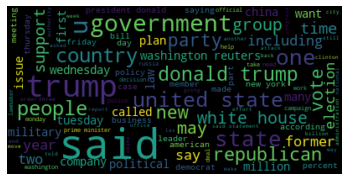

In [12]:
# wordcloud Lemmatization 
wordcloud_plot(true_lemm)

## 2 – Classification with Machine Learning Models


In [13]:
# add label to datasets
df_fake['label'] = 0
df_true['label'] = 1

In [14]:
# concatenate datasets
df = pd.concat([df_fake, df_true])

# clean text 
df['text_review'] = df['text'].apply(lambda review: clean_news(review))


In [15]:
# split data 70%-30%
data = df['text_review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y, random_state = 124)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (1571,) (1571,)
Test data: (674,) (674,)


In [16]:
# Run for different models and feature types
data_train_test = (X_train, X_test, y_train, y_test)
list_features = ['BOW', 'TF', 'TFIDF']
list_models = ['NB', 'Logistic', 'Tree', 'SVM', 'KNN']

f1 = [] 
m1 = []
p1 = []
r1 = []
ac1 = []
for f in list_features:
    for m in list_models:
        result1 = models_cls(data_train_test, model_type = m, features = f)
        p1.append(result1[0])
        r1.append(result1[1])
        ac1.append(result1[2])
        
        f1.append(f)
        m1.append(m)
        
d = {'Model':m1, 'Feature':f1, 'Precision':p1, 'Recall':r1, 'Accuracy':ac1}
ml_results = pd.DataFrame(d)
ml_results   



,Model,Feature,Precision,Recall,Accuracy
0,NB,BOW,0.916418,0.953416,0.936202
1,Logistic,BOW,0.966565,0.987578,0.977745
2,Tree,BOW,0.984709,1.000000,0.992582
3,SVM,BOW,0.953846,0.962733,0.959941
4,KNN,BOW,0.781659,0.555901,0.713650
5,NB,TF,0.911243,0.956522,0.934718
6,Logistic,TF,0.957187,0.972050,0.965875
7,Tree,TF,0.987539,0.984472,0.986647
8,SVM,TF,0.963526,0.984472,0.974777
9,KNN,TF,0.945455,0.161491,0.594955


## 3 – Confusion Matrix


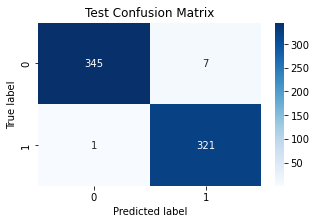

In [17]:
data_train_test = (X_train, X_test, y_train, y_test)
models_cls_confusion_matrix(data_train_test, model_type = 'Tree', features = 'BOW')
